In [1]:
# Dependencies
import pandas as pd
import numpy as np
from pathlib import Path

# visualizations
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_one = Path("../project-1-group17/global-data.csv")
raw_df = pd.read_csv(file_one, encoding="UTF-8")
raw_df.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


In [3]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [4]:
# drop Renewables (% equivalent primary energy) 
# Financial flows to developing countries (US $) null/zero values assumed to be zero 
# repleaced nulls with zeros on Renewable-electricity-generating-capacity-per-capita
# Dropping Density (density\n(P/Km2) over concerns of accuracy and relevance 
new_data_df = raw_df.drop(columns=["Renewables (% equivalent primary energy)"])
new_data_df.info()
#Questions for Prof/TA
# Do we need the data to have the same number of data points? 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 20 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [5]:
# drop Renewables (% equivalent primary energy) 
new_data_df = raw_df.drop(columns=["Renewables (% equivalent primary energy)"])
new_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 20 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [6]:
# Financial flows to developing countries (US $) null/zero values assumed to be zero 
mask = pd.isna(new_data_df["Financial flows to developing countries (US $)"])
new_data_df.loc[mask, "Financial flows to developing countries (US $)"] = 0

new_data_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 20 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    3649 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [7]:
mask = pd.isna(new_data_df["Renewable-electricity-generating-capacity-per-capita"])
new_data_df.loc[mask, "Renewable-electricity-generating-capacity-per-capita"] = 0

print(new_data_df['Renewable-electricity-generating-capacity-per-capita'].tail())

3644    62.88
3645    62.33
3646    82.53
3647    81.40
3648    80.61
Name: Renewable-electricity-generating-capacity-per-capita, dtype: float64


In [8]:
file_two = Path("../project-1-group17/countriescontinents.csv")
continent_data = pd.read_csv(file_two, encoding="UTF-8")
continent_data.head()


,Continent,Entity
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina


In [9]:
new_data_df.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,0.0,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074,60,652230.0,33.93911,67.709953


In [10]:
new_data_df.corr(numeric_only=True)

,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Land Area(Km2),Latitude,Longitude
Year,1.000000,0.124890,0.073292,0.086321,0.109810,-0.029384,0.032615,-0.004820,0.073935,0.030126,0.004196,-0.161605,0.024759,-0.192566,0.135399,-0.001629,0.003507,0.000944
Access to electricity (% of population),0.124890,1.000000,0.866554,0.147251,-0.025445,-0.784514,0.123999,0.128713,0.138057,-0.151062,0.454870,-0.252949,0.126988,-0.112071,0.418459,0.054964,0.420548,-0.102857
Access to clean fuels for cooking,0.073292,0.866554,1.000000,0.083259,-0.053580,-0.791740,0.100752,0.163473,0.124486,-0.120110,0.551347,-0.194884,0.095629,-0.145301,0.545165,0.074630,0.432700,-0.131847
Renewable-electricity-generating-capacity-per-capita,0.086321,0.147251,0.083259,1.000000,0.045997,0.113385,0.017690,-0.047461,0.098788,0.327388,-0.081174,-0.023792,0.018405,0.017826,-0.125714,0.035178,-0.169534,-0.027171
Financial flows to developing countries (US $),0.109810,-0.025445,-0.053580,0.045997,1.000000,0.064814,0.101776,-0.009954,0.096883,0.021199,-0.096170,-0.004829,0.106098,0.040992,-0.093223,0.102777,-0.062102,0.021674
Renewable energy share in the total final energy consumption (%),-0.029384,-0.784514,-0.791740,0.113385,0.064814,1.000000,-0.134888,-0.136525,-0.068779,0.467862,-0.429362,0.247050,-0.132715,0.075236,-0.370648,-0.045395,-0.330140,0.018284
Electricity from fossil fuels (TWh),0.032615,0.123999,0.100752,0.017690,0.101776,-0.134888,1.000000,0.646716,0.845067,-0.063773,0.105529,0.030998,0.989741,0.020956,0.107793,0.627682,0.110994,0.045413
Electricity from nuclear (TWh),-0.004820,0.128713,0.163473,-0.047461,-0.009954,-0.136525,0.646716,1.000000,0.492011,0.071715,0.180833,-0.007496,0.598495,-0.048455,0.231349,0.473280,0.177961,-0.087111
Electricity from renewables (TWh),0.073935,0.138057,0.124486,0.098788,0.096883,-0.068779,0.845067,0.492011,1.000000,0.091451,0.119760,0.009425,0.856270,-0.002531,0.139674,0.704884,0.112833,-0.016380
Low-carbon electricity (% electricity),0.030126,-0.151062,-0.120110,0.327388,0.021199,0.467862,-0.063773,0.071715,0.091451,1.000000,-0.119386,0.047489,-0.054515,-0.015196,0.007945,0.044866,-0.029134,-0.045336


In [11]:
# Group the data by country and calculate the mean renewable energy share
grouped_data = new_data_df.groupby("Entity")["Renewable energy share in the total final energy consumption (%)"].mean()

# Sort the countries based on the mean renewable energy share in descending order
sorted_data = grouped_data.sort_values(ascending=False)

# Display the top 10 countries with the highest renewable energy share
top_10_countries = sorted_data.head(10)
print(top_10_countries)

Entity
Somalia                     93.8005
Uganda                      93.0705
Ethiopia                    93.0030
Burundi                     92.4315
Central African Republic    91.8745
Bhutan                      88.9885
Guinea-Bissau               88.2055
Liberia                     88.0370
Rwanda                      87.6675
Zambia                      86.8955
Name: Renewable energy share in the total final energy consumption (%), dtype: float64


Index(['Renewable energy share in the total final energy consumption (%)'], dtype='object')


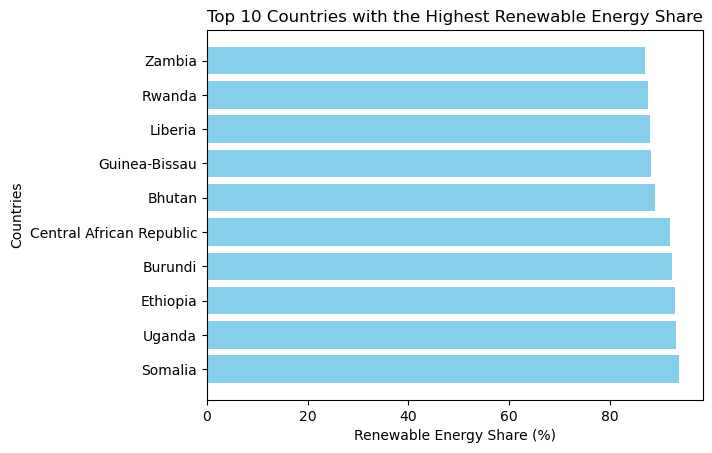

In [12]:
# Convert the Series to a DataFrame
top_10_countries_df = top_10_countries.to_frame()

# Print the column names to verify the exact column name
print(top_10_countries_df.columns)

# Create a figure and axis
fig, ax = plt.subplots()

# Replace 'Correct_Column_Name_Here' with the actual column name for renewable energy share
column_name = "Renewable energy share in the total final energy consumption (%)"

# Plot the top 10 countries with the highest renewable energy share
ax.barh(top_10_countries_df.index, top_10_countries_df[column_name], color='skyblue')

# Set labels and title
ax.set_xlabel('Renewable Energy Share (%)')
ax.set_ylabel('Countries')
ax.set_title('Top 10 Countries with the Highest Renewable Energy Share')

# Display the plot
plt.show()

In [13]:
# Group the data by country and calculate the mean renewable energy share
grouped_data = new_data_df.groupby("Entity")["Renewable energy share in the total final energy consumption (%)"].mean()

# Sort the countries based on the mean renewable energy share in ascending order
sorted_data = grouped_data.sort_values(ascending=True)

# Drop duplicates to avoid repeating countries
unique_sorted_data = sorted_data.drop_duplicates()

# Display the bottom 10 countries with the lowest renewable energy share
bottom_10_countries = unique_sorted_data.head(10)
print(bottom_10_countries)

Entity
Oman                    0.0000
Cayman Islands          0.0055
Kuwait                  0.0065
Saudi Arabia            0.0120
Turkmenistan            0.0680
Qatar                   0.0720
Nauru                   0.1340
United Arab Emirates    0.1465
Antigua and Barbuda     0.2005
Algeria                 0.2870
Name: Renewable energy share in the total final energy consumption (%), dtype: float64


Index(['Renewable energy share in the total final energy consumption (%)'], dtype='object')


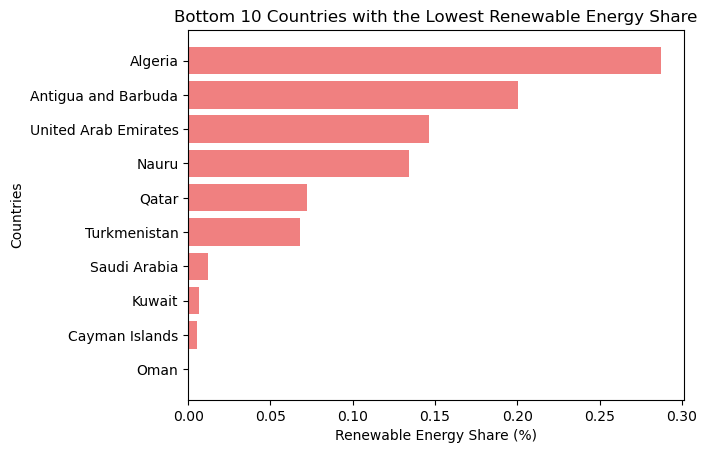

In [14]:
# Convert the Series to a DataFrame
bottom_10_countries_df = bottom_10_countries.to_frame()

# Print the column names to verify the exact column name
print(bottom_10_countries_df.columns)

# Create a figure and axis
fig, ax = plt.subplots()

# Replace 'Correct_Column_Name_Here' with the actual column name for renewable energy share
column_name = "Renewable energy share in the total final energy consumption (%)"

# Plot the bottom 10 countries with the lowest renewable energy share
ax.barh(bottom_10_countries_df.index, bottom_10_countries_df[column_name], color='lightcoral')

# Set labels and title
ax.set_xlabel('Renewable Energy Share (%)')
ax.set_ylabel('Countries')
ax.set_title('Bottom 10 Countries with the Lowest Renewable Energy Share')

# Display the plot
plt.show()

In [15]:
# Sort the DataFrame by the "Financial flows to developing countries (US $)" column in descending order
top_10_countries_financial_flows = new_data_df.sort_values(by="Financial flows to developing countries (US $)", ascending=False).drop_duplicates("Entity").head(10)

# Display the top 10 countries with the highest financial flows
print("Top 10 countries with the highest financial flows to developing countries:")
print(top_10_countries_financial_flows[["Entity", "Financial flows to developing countries (US $)"]])


Top 10 countries with the highest financial flows to developing countries:
         Entity  Financial flows to developing countries (US $)
2447    Nigeria                                    5.202310e+09
1143   Ethiopia                                    4.284370e+09
2531   Pakistan                                    3.386850e+09
997     Ecuador                                    2.811680e+09
119   Argentina                                    2.472850e+09
1550      India                                    2.112780e+09
1025      Egypt                                    2.070240e+09
3622     Zambia                                    1.791180e+09
3431     Uganda                                    1.470000e+09
751    Colombia                                    1.454760e+09


In [16]:
top_10_countries_financial_flows.head(30)

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
2447,Nigeria,2017,54.400000,8.7,11.21,5.202310e+09,82.32,25.06,0.00,7.72,23.550947,2358.80800,6.31,1.085000e+05,0.805887,1968.565398,226,923768.0,9.081999,8.675277
1143,Ethiopia,2009,23.690039,1.9,16.91,4.284370e+09,94.18,0.42,0.00,3.55,89.420654,434.64044,13.85,6.530000e+03,8.802553,380.569003,115,1104300.0,9.145000,40.489673
2531,Pakistan,2017,70.790000,44.8,44.33,3.386850e+09,42.09,91.08,8.11,32.39,30.779753,4348.82960,4.65,1.988300e+05,5.554277,1464.926195,287,796095.0,30.375321,69.345116
997,Ecuador,2010,97.462140,93.6,156.29,2.811680e+09,11.79,9.77,0.00,9.00,47.948853,10353.47300,3.47,3.725000e+04,3.525299,4633.591284,71,283561.0,-1.831239,-78.183406
119,Argentina,2014,100.000000,99.7,248.74,2.472850e+09,9.79,92.18,5.26,34.37,30.066004,22881.00600,3.40,1.796000e+05,-2.512615,12334.798250,17,2780400.0,-38.416097,-63.616672
1550,India,2016,89.217800,51.4,68.18,2.112780e+09,33.02,1155.52,37.90,208.21,17.558842,6184.24950,4.54,2.195250e+06,8.256306,1732.554242,464,3287263.0,20.593684,78.962880
1025,Egypt,2017,100.000000,99.9,39.42,2.070240e+09,5.10,181.31,0.00,15.53,7.889657,10471.64550,3.67,NaN,NaN,NaN,103,1001450.0,26.820553,30.802498
3622,Zambia,2015,31.100000,14.0,145.55,1.791180e+09,83.09,0.36,0.00,13.00,97.305390,3115.06760,7.41,4.960000e+03,2.920375,1338.290927,25,752618.0,-13.133897,27.849332
3431,Uganda,2013,13.900000,0.8,20.90,1.470000e+09,92.55,0.14,0.00,2.45,94.594600,651.41376,10.34,3.690000e+03,3.586906,810.090395,229,241038.0,1.373333,32.290275
751,Colombia,2016,98.400000,90.7,246.63,1.454760e+09,30.74,25.02,0.00,49.54,66.443140,11435.30300,2.58,8.268000e+04,2.087383,5870.777957,46,1138910.0,4.570868,-74.297333


In [17]:
#Questions for Prof/TA
# Do we need the data to have the same number of data points? 


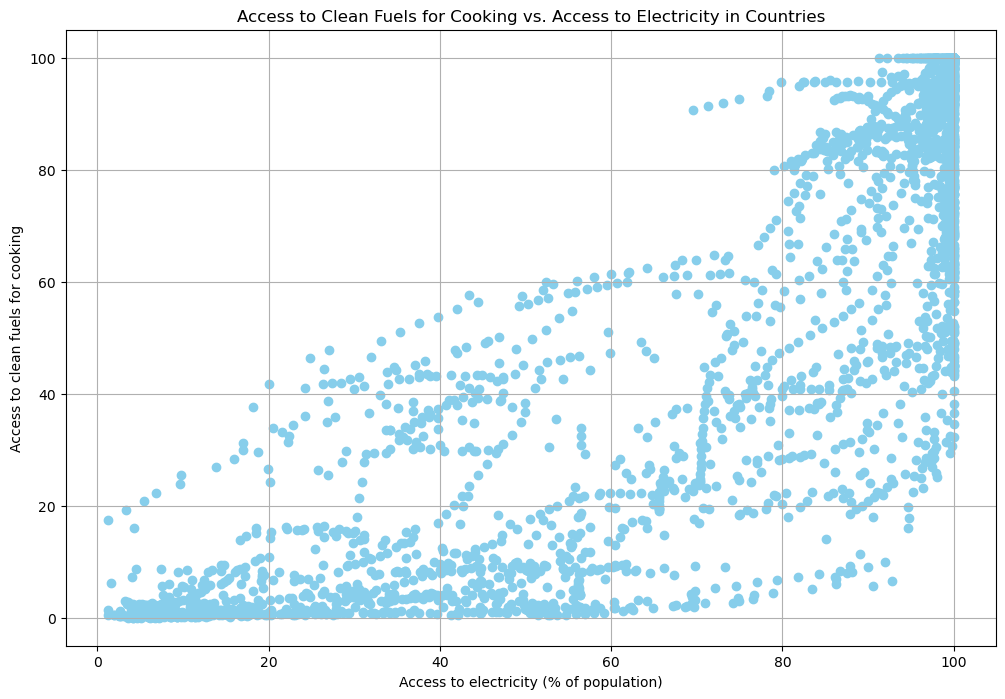

In [18]:
# Sort the DataFrame based on access to electricity (% of population)
access_to_elec_sorted = new_data_df.sort_values('Access to electricity (% of population)', ascending=False)

# Visualize the data
plt.figure(figsize=(12, 8))
plt.scatter(access_to_elec_sorted['Access to electricity (% of population)'], access_to_elec_sorted['Access to clean fuels for cooking'], color='skyblue')
plt.xlabel('Access to electricity (% of population)')
plt.ylabel('Access to clean fuels for cooking')
plt.title('Access to Clean Fuels for Cooking vs. Access to Electricity in Countries')
plt.grid(True)
plt.show()

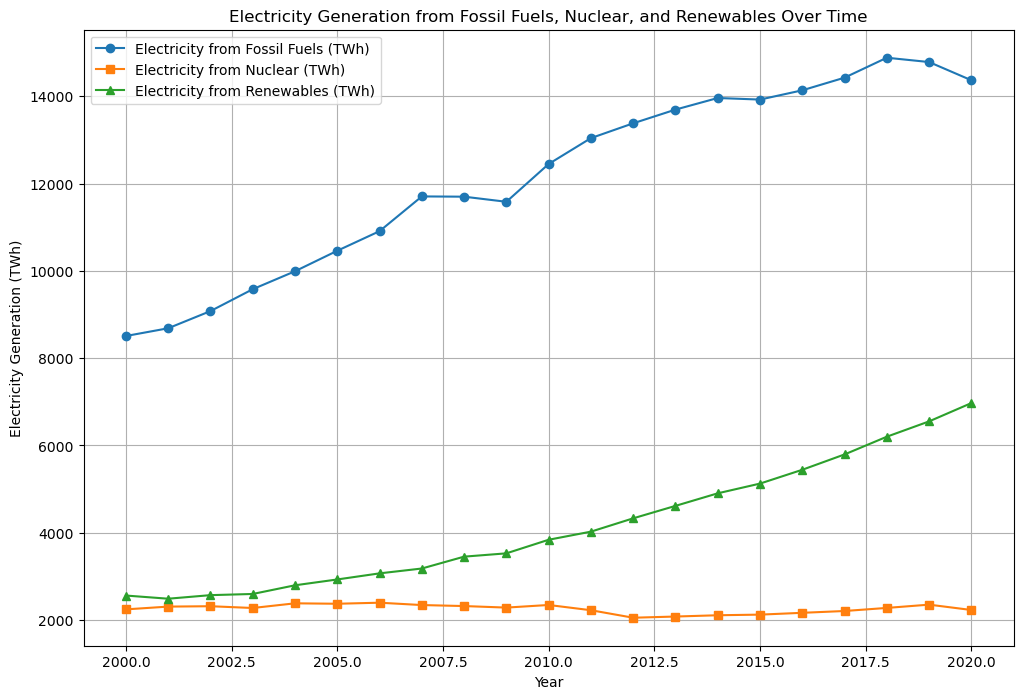

In [19]:
# Group the data by year
grouped = new_data_df.groupby('Year')

# Initialize empty lists to store data for each category
fossil_fuels_data = []
nuclear_data = []
renewables_data = []

# Iterate over each year and calculate the total electricity generation for each category
for year, data in grouped:
    fossil_fuels_total = data['Electricity from fossil fuels (TWh)'].sum()
    nuclear_total = data['Electricity from nuclear (TWh)'].sum()
    renewables_total = data['Electricity from renewables (TWh)'].sum()
    
    fossil_fuels_data.append(fossil_fuels_total)
    nuclear_data.append(nuclear_total)
    renewables_data.append(renewables_total)

# Create a line plot to show the growth in electricity generation from fossil fuels, nuclear, and renewables over time
plt.figure(figsize=(12, 8))
plt.plot(new_data_df['Year'].unique(), fossil_fuels_data, label='Electricity from Fossil Fuels (TWh)', marker='o')
plt.plot(new_data_df['Year'].unique(), nuclear_data, label='Electricity from Nuclear (TWh)', marker='s')
plt.plot(new_data_df['Year'].unique(), renewables_data, label='Electricity from Renewables (TWh)', marker='^')

plt.xlabel('Year')
plt.ylabel('Electricity Generation (TWh)')
plt.title('Electricity Generation from Fossil Fuels, Nuclear, and Renewables Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
file_two = Path("../project-1-group17/countriescontinents.csv")
continent_data = pd.read_csv(file_two, encoding="UTF-8")
continent_data.head()


,Continent,Entity
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina


In [26]:
continent_energy_data = pd.merge(new_data_df, continent_data, how="left", on=["Entity"])
continent_energy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              3649 non-null   float64
 5   Financial flows to developing countries (US $)                    3649 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

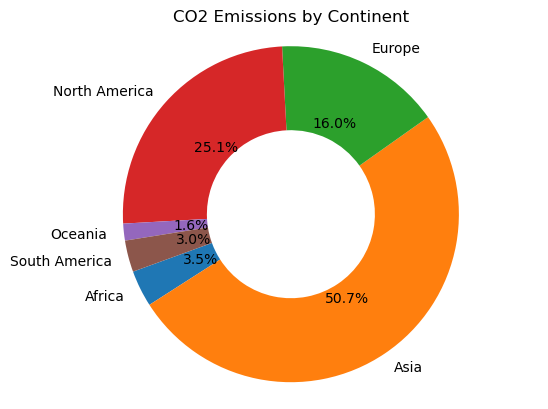

In [22]:
# Grouping the data by 'Continent' and summing the CO2 emissions values
grouped_data = continent_energy_data.groupby("Continent")["Value_co2_emissions_kt_by_country"].sum()

# Plotting the data in a doughnut chart
fig, ax = plt.subplots()
ax.pie(grouped_data, labels=grouped_data.index, autopct='%1.1f%%', startangle=200, wedgeprops=dict(width=0.5))
ax.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("CO2 Emissions by Continent")
plt.show()

In [27]:
# Grouping the filtered data by 'Continent' and summing the CO2 emissions values for each year
grouped_data_2000 = data_2000.groupby('Continent')['Value_co2_emissions_kt_by_country'].sum()
grouped_data_2019 = data_2019.groupby('Continent')['Value_co2_emissions_kt_by_country'].sum()

# Plotting doughnut chart for CO2 emissions distribution by continent for the year 2000
fig, ax = plt.subplots()
ax.pie(grouped_data_2000, labels=grouped_data_2000.index, autopct='%1.1f%%', startangle=150, wedgeprops=dict(width=0.5))
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('CO2 Emissions Distribution by Continent for Year 2000')
plt.show()

# Plotting doughnut chart for CO2 emissions distribution by continent for the year 2019
fig, ax = plt.subplots()
ax.pie(grouped_data_2019, labels=grouped_data_2019.index, autopct='%1.1f%%', startangle=150, wedgeprops=dict(width=0.5))
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('CO2 Emissions Distribution by Continent for Year 2019')
plt.show()

NameError: name 'data_2000' is not defined

In [ ]:
# Define custom font properties
font_dict = {'fontsize': 12, 'fontweight': 'regular', 'color': 'black'}

# Plotting doughnut chart for CO2 emissions distribution by continent for the year 2000
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(grouped_data_2000, labels=grouped_data_2000.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.5),
                                  textprops=font_dict)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.setp(autotexts, size=8, weight='regular')  # Set properties for the percentage values
plt.title('CO2 Emissions Distribution by Continent for Year 2000')
plt.show()

# Plotting doughnut chart for CO2 emissions distribution by continent for the year 2019
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(grouped_data_2019, labels=grouped_data_2019.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.5),
                                  textprops=font_dict)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.setp(autotexts, size=8, weight='regular')  # Set properties for the percentage values
plt.title('CO2 Emissions Distribution by Continent for Year 2019')
plt.show()

In [ ]:
# Filter the DataFrame to include data for the top 10 countries based on electricity generation
top_10_countries = new_data_df.groupby('Entity').sum().nlargest(10, 'Electricity from fossil fuels (TWh)').index

# Filter the DataFrame to include data for the top 10 countries and years 2010 and 2020
top_10_data = new_data_df[(new_data_df['Entity'].isin(top_10_countries)) & (new_data_df['Year'].isin([2010, 2020]))]

# Group the data by year and electricity source
grouped_data = top_10_data.groupby(['Year', 'Entity'])[['Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)', 'Electricity from renewables (TWh)']].sum()

# Create a bar chart to compare electricity generation from different sources for the top 10 countries in 2010 and 2020
fig, ax = plt.subplots(figsize=(10, 8))
grouped_data.unstack().plot(kind='bar', stacked=True, ax=ax)
plt.xlabel('Country')
plt.ylabel('Electricity Generation (TWh)')
plt.title('Electricity Generation from Fossil Fuels, Nuclear, and Renewables in 2010 and 2020 for Top 10 Countries')
plt.legend(title='Electricity Source')
plt.grid(axis='y')
plt.show()

In [ ]:
# Merge the DataFrames on a common key (e.g., entity or country name)
c02_merged_df = pd.merge(new_data_df, continent_data, how="left", left_on="Entity", right_on="Continent")
c02_merged_df.info()

# Group by the continent column
grouped_by_continent = c02_merged_df.groupby('Continent')

# Create a doughnut chart based on the summary statistics
summary_stats.plot(kind='pie', subplots=True, autopct='%1.1f%%', startangle=90, colors=['red', 'green'], wedgeprops=dict(width=0.4))

# Add a title to the chart
plt.title('Summary Statistics for Continents')

# Display the chart
plt.show()

In [ ]:
# Find the top and bottom countries based on access to electricity
top_country = access_to_elec_sorted['Entity'].iloc[0]
bottom_country = access_to_elec_sorted['Entity'].iloc[-1]

# Visualize the data
plt.figure(figsize=(12, 8))
plt.scatter(access_to_elec_sorted['Access to electricity (% of population)'], access_to_elec_sorted['Access to clean fuels for cooking'], color='skyblue')
plt.xlabel('Access to electricity (% of population)')
plt.ylabel('Access to clean fuels for cooking')
plt.title('Access to Clean Fuels for Cooking vs. Access to Electricity in Countries')
plt.grid(True)

# Annotate the top country
plt.annotate(top_country, 
             (access_to_elec_sorted['Access to electricity (% of population)'].iloc[0], access_to_elec_sorted['Access to clean fuels for cooking'].iloc[0]),
             textcoords="offset points", xytext=(10,-5), ha='center')

# Annotate the bottom country
plt.annotate(bottom_country, 
             (access_to_elec_sorted['Access to electricity (% of population)'].iloc[-1], access_to_elec_sorted['Access to clean fuels for cooking'].iloc[-1]),
             textcoords="offset points", xytext=(10,5), ha='left')

plt.show()

In [ ]:
# Filter the DataFrame to include data for the years 2000 to 2020
filtered_data = new_data_df[(new_data_df['Year'] >= 2000) & (new_data_df['Year'] <= 2020)]

# Extract the required columns for the stack plot
stackplot_data = filtered_data[['Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)', 'Electricity from renewables (TWh)']]

# Create a stack plot for the selected columns from 2000 to 2020
plt.figure(figsize=(12, 8))
plt.stackplot(filtered_data['Year'], stackplot_data.T, labels=stackplot_data.columns, alpha=0.5)
plt.xlabel('Year')
plt.ylabel('Electricity Generation (TWh)')
plt.title('Electricity Generation from Fossil Fuels, Nuclear, and Renewables Over Time (2000-2020)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Stackplot
import matplotlib.pyplot as plt

# Create data
x = range(1, 10)
y1 = [10, 15, 20, 25, 30, 25, 20, 15, 10]  # Sample data for Electricity from fossil fuels (TWh)
y2 = [5, 10, 15, 20, 25, 20, 15, 10, 5]     # Sample data for Electricity from nuclear (TWh)
y3 = [2, 5, 8, 10, 12, 10, 8, 5, 2]         # Sample data for Electricity from renewables (TWh)

# Basic stacked area chart
plt.stackplot(x, y1, y2, y3, labels=['Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)', 'Electricity from renewables (TWh)'])
plt.legend(loc='upper left')
plt.xlabel('Year')
plt.ylabel('Electricity Generation (TWh)')
plt.title('Electricity Generation from Fossil Fuels, Nuclear, and Renewables Over Time')
plt.show()

In [ ]:
y1 = [10, 15, 20, 25, 30, 25, 20, 15, 10]  # Sample data for Electricity from fossil fuels (TWh)
y2 = [5, 10, 15, 20, 25, 20, 15, 10, 5]     # Sample data for Electricity from nuclear (TWh)
y3 = [2, 5, 8, 10, 12, 10, 8, 5, 2]         # Sample data for Electricity from renewables (TWh)

x = range(1, len(y1) + 1)  # Assuming x values are 1 to 9

# Create cumulative data for stack plot
cumulative_y1 = [sum(y1[:i]) for i in range(1, len(y1) + 1)]
cumulative_y2 = [sum(y2[:i]) for i in range(1, len(y2) + 1)]
cumulative_y3 = [sum(y3[:i]) for i in range(1, len(y3) + 1)]

# Create a stack plot to show electricity generation from fossil fuels, nuclear, and renewables
fig, ax = plt.subplots(figsize=(10, 6))
ax.stackplot(x, cumulative_y1, cumulative_y2, cumulative_y3, labels=['Fossil Fuels', 'Nuclear', 'Renewables'])
plt.xlabel('Time')
plt.ylabel('Electricity Generation (TWh)')
plt.title('Electricity Generation from Fossil Fuels, Nuclear, and Renewables')
plt.legend()
plt.show()

In [ ]:
# Here's an example of how you can modify the code to show the growth over time in years:

import matplotlib.pyplot as plt

y1 = [10, 15, 20, 25, 30, 25, 20, 15, 10]  # Sample data for Electricity from fossil fuels (TWh)
y2 = [5, 10, 15, 20, 25, 20, 15, 10, 5]     # Sample data for Electricity from nuclear (TWh)
y3 = [2, 5, 8, 10, 12, 10, 8, 5, 2]         # Sample data for Electricity from renewables (TWh)

years = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]  # Years for the data

# Create cumulative data for stack plot
cumulative_y1 = [sum(y1[:i]) for i in range(1, len(y1) + 1)]
cumulative_y2 = [sum(y2[:i]) for i in range(1, len(y2) + 1)]
cumulative_y3 = [sum(y3[:i]) for i in range(1, len(y3) + 1)]

# Create a stack plot to show electricity generation from fossil fuels, nuclear, and renewables over time
fig, ax = plt.subplots(figsize=(10, 6))
ax.stackplot(years, cumulative_y1, cumulative_y2, cumulative_y3, labels=['Fossil Fuels', 'Nuclear', 'Renewables'])
plt.xlabel('Year')
plt.ylabel('Electricity Generation (TWh)')
plt.title('Electricity Generation from Fossil Fuels, Nuclear, and Renewables over Time')
plt.legend()
plt.show()

In [ ]:
# Sample data for Electricity generation from fossil fuels, nuclear, and renewables for the past 20 years (2000-2020)
y1 = [10, 15, 20, 25, 30, 25, 20, 15, 10, 8, 12, 18, 22, 26, 30, 28, 24, 20, 15, 10]  # Fossil Fuels (TWh)
y2 = [5, 10, 15, 20, 25, 20, 15, 10, 5, 4, 6, 9, 11, 13, 15, 14, 12, 10, 7, 5]         # Nuclear (TWh)
y3 = [2, 5, 8, 10, 12, 10, 8, 5, 2, 3, 4, 6, 8, 10, 12, 11, 9, 7, 5, 3]               # Renewables (TWh)

# Years for the data (2000-2020)
years = range(2010, 2021)

# Truncate the last year from the years range to match the length of the data arrays
years = years[:-1]

# Create cumulative data for stack plot
cumulative_y1 = [sum(y1[:i]) for i in range(1, len(y1) + 1)]
cumulative_y2 = [sum(y2[:i]) for i in range(1, len(y2) + 1)]
cumulative_y3 = [sum(y3[:i]) for i in range(1, len(y3) + 1)]

# Create a stack plot to show electricity generation from fossil fuels, nuclear, and renewables over the past 20 years
fig, ax = plt.subplots(figsize=(12, 8))
ax.stackplot(years, cumulative_y1, cumulative_y2, cumulative_y3, labels=['Fossil Fuels', 'Nuclear', 'Renewables'])
plt.xlabel('Year')
plt.ylabel('Electricity Generation (TWh)')
plt.title('Electricity Generation from Fossil Fuels, Nuclear, and Renewables (2000-2020)')
plt.legend()
plt.show()